# Make wordclouds

In [41]:
# import public things

# general / random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipynb
import re # for string parsing / editing
import string # for string parsing / editing
from datetime import datetime
import time
import random
from pathlib import Path
import os
import ast

# for html
import requests # for getting html off the web
from bs4 import BeautifulSoup # for parsing html
import json

# for ML
from wordcloud import WordCloud, STOPWORDS
import snowballstemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# import functions from my functions file
import ipynb.fs.full.functions as funcs

# update a module if it's been edited
# (this is just going around a jupyter feature where simply re-importing doesn't do anything)
# https://support.enthought.com/hc/en-us/articles/204469240-Jupyter-IPython-After-editing-a-module-changes-are-not-effective-without-kernel-restart
import importlib
importlib.reload(funcs)

# other useful settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5)

## Get the processed recipe data

In [42]:
# input the name (which is a timestamp) of the folder for the round of interest

input_timestamp = 'joint_2021-05-11_11-28'

In [43]:
# read in the dataframe with al the recipe info from Excel file
df = pd.read_excel(f'/home/bkotryna/ML_practice/allrecipes_project/data/{input_timestamp}/processed_recipe_data.xlsx')

# set recipe_id as index
df.set_index('recipe_id', inplace=True)

# inspect
display(df)

,title,date_published,description,avg_rating,ratings_no,recipe_cats,5 stars,4 stars,3 stars,2 stars,1 star,reviews_no,video_present,photo_count,prepTime,cookTime,totalTime,ingredients_no,ingredient_names,steps_no,steps_str,steps_words_no,nutrition.calories,nutrition.carbohydrateContent,nutrition.cholesterolContent,nutrition.fatContent,nutrition.fiberContent,nutrition.proteinContent,nutrition.saturatedFatContent,nutrition.servingSize,nutrition.sodiumContent,nutrition.sugarContent,nutrition.transFatContent,nutrition.unsaturatedFatContent
recipe_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10004,Pavlova,2019-04-04,My grandmother's recipe from New Zealand for t...,4.520000,25,"['Dessert Recipes', 'Specialty Dessert Recipes...",18,4,1,2,0,19,0,8,0,0,0,6,"['egg whites', 'distilled white vinegar', 'col...",4,Preheat oven to 300 degrees F (150 degrees C)....,102,108.1 calories,26 g,NaN,NaN,NaN,1.4 g,NaN,NaN,21.3 mg,25.2 g,NaN,NaN
10007,Evelyn's Cornflake Cookies,1997-09-26,I got this recipe from my ex mother-in-law ...,4.000000,8,"['Dessert Recipes', 'Cookies']",4,1,2,1,0,8,0,2,0,0,0,9,"['cream cheese', 'butter', 'white sugar', 'all...",3,Cream together all ingredients except cornflak...,56,195.6 calories,24.6 g,28.1 mg,10.3 g,0.5 g,2 g,6.4 g,NaN,198.6 mg,8.9 g,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,Dutch Cinnamon Biscuits,2008-06-30,Tender with a spicy flavor.,2.750000,4,"['World Cuisine Recipes', 'European', 'Dutch']",0,1,2,0,1,4,0,1,0,0,0,7,"['butter', 'white sugar', 'all-purpose flour',...",3,Preheat oven to 350 degrees F (175 degrees C)....,92,159.9 calories,17.5 g,35.8 mg,9 g,0.6 g,2.6 g,5.1 g,NaN,61.1 mg,5.4 g,NaN,NaN
9954,French Butter Cakes (Madeleines),2008-06-30,Sponge cake cookie--in shell shaped molds.,4.520635,315,"['World Cuisine Recipes', 'European', 'French']",219,62,20,7,7,247,1,137,0,0,0,8,"['eggs', 'vanilla extract', 'salt', 'white sug...",9,Preheat oven to 375 degrees F (190 degrees C)....,202,108.8 calories,15.3 g,41.2 mg,4.7 g,0.2 g,1.6 g,2.7 g,NaN,63.3 mg,11.2 g,NaN,NaN


In [44]:
# create a new folder for storing wordcloud images

folder = f'/home/bkotryna/ML_practice/allrecipes_project/data/{input_timestamp}/wordclouds'
path_folder = Path(folder)
path_folder.mkdir(parents=True, exist_ok=True)

print(f'Created directory for storing wordclouds in:\n{folder}')

Created directory for storing wordclouds in:
/home/bkotryna/ML_practice/allrecipes_project/data/joint_2021-05-11_11-28/wordclouds


## Make wordclouds

In [45]:
# make ingredients into a string

df['ingredient_names_str'] = df['ingredient_names'].apply(lambda x: x[1:-1])
df['ingredient_names_str'] = df['ingredient_names_str'].apply(lambda x: x.replace("'", ""))

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 10004 to 9954
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   title                            3391 non-null   object 
 1   date_published                   3391 non-null   object 
 2   description                      3391 non-null   object 
 3   avg_rating                       3391 non-null   float64
 4   ratings_no                       3391 non-null   int64  
 5   recipe_cats                      3391 non-null   object 
 6   5 stars                          3391 non-null   int64  
 7   4 stars                          3391 non-null   int64  
 8   3 stars                          3391 non-null   int64  
 9   2 stars                          3391 non-null   int64  
 10  1 star                           3391 non-null   int64  
 11  reviews_no                       3391 non-null   int64  
 12  video_present   

None

In [46]:
# choose columns to visualise
column_indexes_to_visualise = [0, 2, 20, 34]
column_names = df.columns[column_indexes_to_visualise].tolist()
print(column_names)

['title', 'description', 'steps_str', 'ingredient_names_str']



*********
Now working on title:


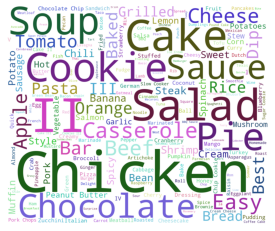


*********
Now working on description:


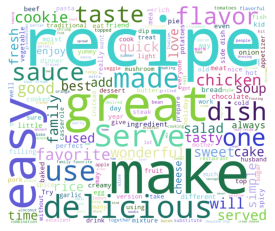


*********
Now working on steps_str:


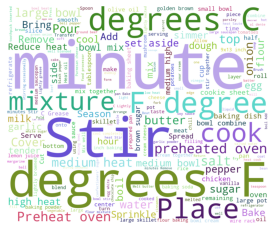


*********
Now working on ingredient_names_str:


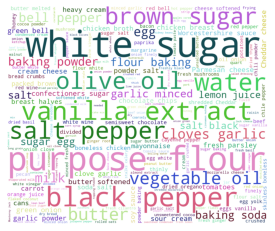

<Figure size 432x288 with 0 Axes>

In [47]:
# make wordclouds

for column_name in column_names:
    funcs.make_wordclouds(column_name, df, funcs.random_color_func, input_timestamp)